In [56]:
pip install keras

     ---------------------------------------- 0.0/49.8 kB ? eta -:--:--
     ---------------------------------------- 49.8/49.8 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------------ --------------------------- 0.4/1.3 MB 13.5 MB/s eta 0:00:01
   --------------------- ------------------ 0.7/1.3 MB 8.9 MB/s eta 0:00:01
   ------------------------ --------------- 0.8/1.3 MB 6.5 MB/s eta 0:00:01
   --------------------------------- ------ 1.1/1.3 MB 6.5 MB/s eta 0:00:01
   -------------------------------------- - 1.3/1.3 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/210.9 kB ? eta -:--:--
   -------------------------------------- - 204.8/210.9 kB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 210.9/210.9 kB 4.3 MB/s eta 0:00:00
   ------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [5]:
data = pd.read_csv("House_Rent_Dataset.csv")
print(data.head(5))

    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

In [6]:
print(data.isnull().sum())

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


In [7]:
print(data.describe())

               BHK          Rent         Size     Bathroom
count  4746.000000  4.746000e+03  4746.000000  4746.000000
mean      2.083860  3.499345e+04   967.490729     1.965866
std       0.832256  7.810641e+04   634.202328     0.884532
min       1.000000  1.200000e+03    10.000000     1.000000
25%       2.000000  1.000000e+04   550.000000     1.000000
50%       2.000000  1.600000e+04   850.000000     2.000000
75%       3.000000  3.300000e+04  1200.000000     2.000000
max       6.000000  3.500000e+06  8000.000000    10.000000


In [9]:
print(f"Mean Rent: {data.Rent.mean()}")
print(f"Median Rent: {data.Rent.median()}")
print(f"Mode Rent: {data.Rent.mode()}")
print(f"Highest Rent: {data.Rent.max()}")
print(f"Lowest Rent: {data.Rent.min()}")

Mean Rent: 34993.45132743363
Median Rent: 16000.0
Mode Rent: 0    15000
Name: Rent, dtype: int64
Highest Rent: 3500000
Lowest Rent: 1200


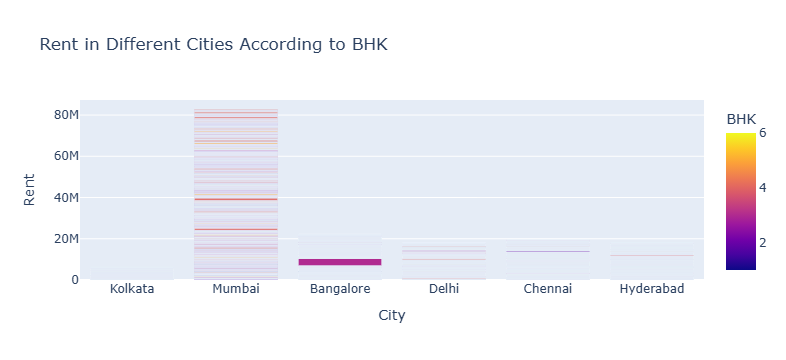

In [12]:
figure = px.bar(data, x=data["City"],
               y = data["Rent"],
               color = data["BHK"],
               title = "Rent in Different Cities According to BHK")
figure.show()

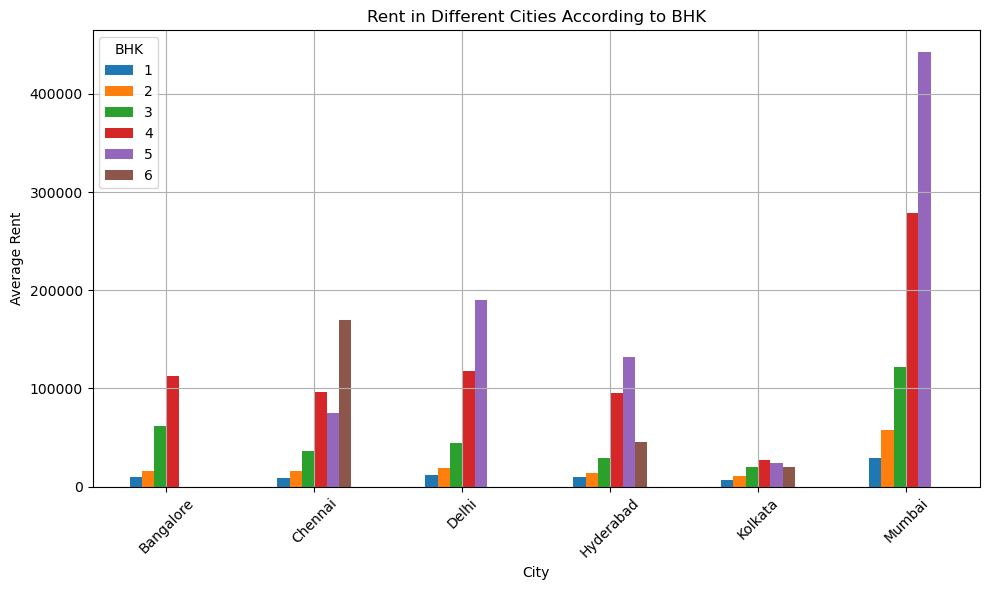

In [11]:
grouped = data.groupby(['City', 'BHK'])['Rent'].mean().unstack(fill_value=0)
grouped.plot(kind='bar', figsize=(10, 6))
plt.title("Rent in Different Cities According to BHK")
plt.xlabel("City")
plt.ylabel("Average Rent")
plt.legend(title="BHK")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

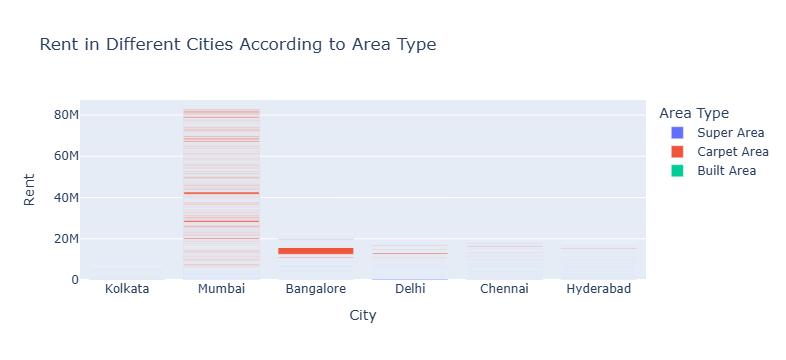

In [13]:
figure = px.bar(data, x = data["City"],
               y = data["Rent"],
               color = data["Area Type"],
               title = "Rent in Different Cities According to Area Type")
figure.show()

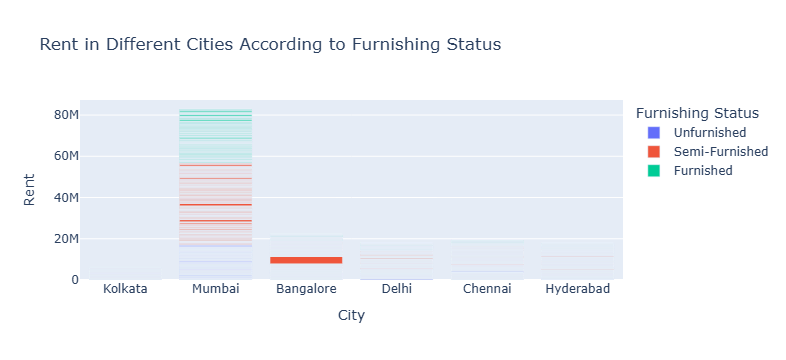

In [14]:
figure = px.bar(data, x = data["City"],
               y = data["Rent"],
               color = data["Furnishing Status"],
               title = "Rent in Different Cities According to Furnishing Status")
figure.show()

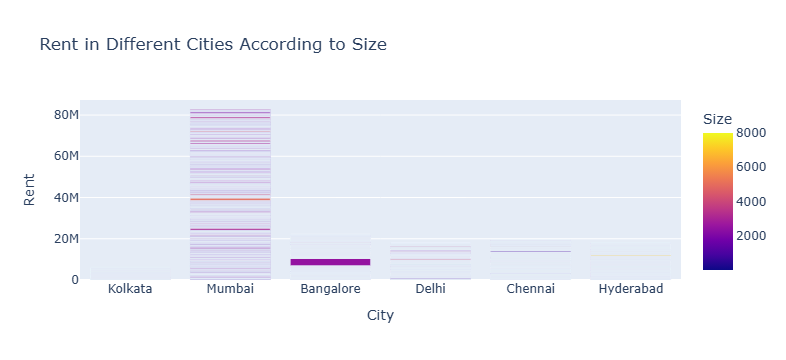

In [15]:
figure = px.bar(data, x = data["City"],
               y = data["Rent"],
               color = data["Size"],
               title = "Rent in Different Cities According to Size")
figure.show()

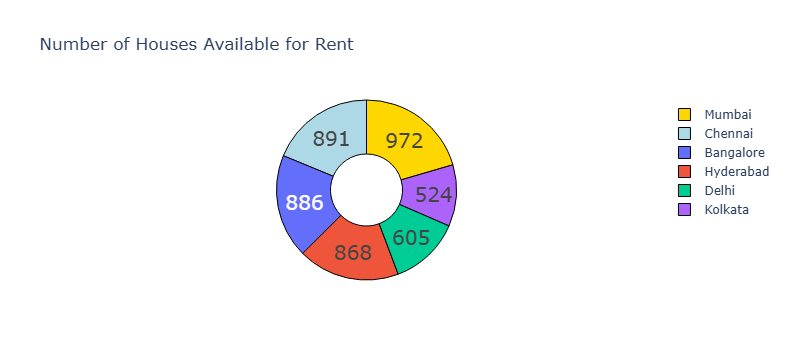

In [42]:
cities = data["City"].value_counts()
label = cities.index
counts = cities.values
colors = ['gold', 'lightblue']

fig = go.Figure(data=[go.Pie(labels = label, values = counts, hole=0.4)])
fig.update_layout(title_text = 'Number of Houses Available for Rent')
fig.update_traces(hoverinfo = 'label+percent', textinfo = 'value', textfont_size = 20,
                 marker=dict(colors = colors, line = dict(color = 'black', width = 1)))
fig.show()

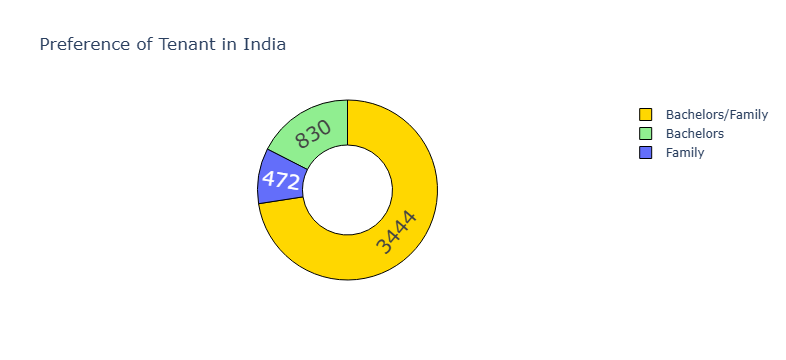

In [43]:
# Preference of Tenant
tenant = data["Tenant Preferred"].value_counts()
label = tenant.index
counts = tenant.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts, hole=0.5)])
fig.update_layout(title_text='Preference of Tenant in India')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='black', width=1)))
fig.show()